<a href="https://colab.research.google.com/github/chaubeyarvind/DataAnalytics-NumPY/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix

from sklearn.model_selection import train_test_split

In [23]:
df = pd.read_csv('/content/sample_data/Classified Data.csv')

In [24]:
df.shape

(1000, 12)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   WTT           1000 non-null   float64
 2   PTI           1000 non-null   float64
 3   EQW           1000 non-null   float64
 4   SBI           1000 non-null   float64
 5   LQE           1000 non-null   float64
 6   QWG           1000 non-null   float64
 7   FDJ           1000 non-null   float64
 8   PJF           1000 non-null   float64
 9   HQE           1000 non-null   float64
 10  NXJ           1000 non-null   float64
 11  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


In [19]:
# standardize the variable
  # z = (x - u)/s

In [26]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [22]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [27]:
df.drop('Unnamed: 0', axis = 1, inplace= True)

In [28]:
df.shape

(1000, 11)

In [29]:
# standardize the variable
# z = (x - u)/s

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
data_s = df.drop('TARGET CLASS', axis = 1)
scaler.fit(data_s)
# compute mean and std for further use

StandardScaler()

In [33]:
sca_feature = scaler.transform(data_s)

In [34]:
df_sca = pd.DataFrame(sca_feature, columns = df.columns[:-1])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_sca, df['TARGET CLASS'], test_size=0.3, random_state=101)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier(n_neighbors=1)

In [38]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [39]:
predictions = knn.predict(X_test)

In [40]:
print(confusion_matrix(y_test, predictions))

[[151   8]
 [ 15 126]]


In [41]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [43]:
# Selecting optimal k values

In [55]:
error_rate = []
for i in range(1, 51):
  knn_temp = KNeighborsClassifier(n_neighbors=i)
  knn_temp.fit(X_train, y_train)
  pred_temp = knn_temp.predict(X_test)
  error_rate.append(np.mean(pred_temp != y_test))

In [56]:
error_rate

[0.07666666666666666,
 0.09,
 0.05,
 0.07,
 0.056666666666666664,
 0.05,
 0.06666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.05,
 0.05,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.04666666666666667,
 0.05333333333333334,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.05,
 0.04,
 0.043333333333333335,
 0.043333333333333335,
 0.043333333333333335,
 0.043333333333333335,
 0.05333333333333334,
 0.05,
 0.06,
 0.056666666666666664,
 0.05333333333333334,
 0.05]

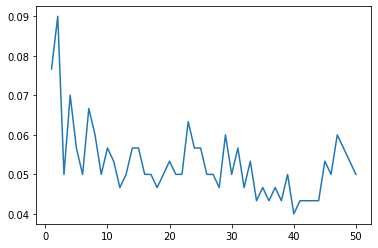

In [59]:
plt.plot(range(1, 51), error_rate)


Text(0, 0.5, 'Error Rate')

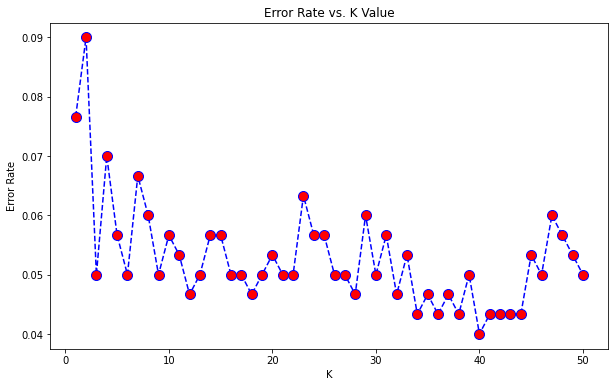

In [60]:
plt.figure(figsize=(10,6))

plt.plot(range(1,51),error_rate,color='blue', linestyle='dashed', marker='o',

markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')

plt.xlabel('K')

plt.ylabel('Error Rate')